In [1]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to your zip file in Drive
zip_path = "/content/drive/MyDrive/cats and dogs.zip"

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile

zip_ref= zipfile.ZipFile('/content/drive/MyDrive/cats and dogs.zip', 'r')

zip_ref.extractall('/content')

zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout

**Data Preprocessing**

In [5]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [6]:
training_data=training_datagen.flow_from_directory('/content/train',
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')

Found 20000 images belonging to 2 classes.


In [7]:
training_data.class_indices

{'cats': 0, 'dogs': 1}

In [8]:
valid_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
valid_data =  valid_datagen.flow_from_directory('/content/test',
                                      target_size=(150,150),
                                      batch_size=32,
                                      class_mode='binary')

Found 5000 images belonging to 2 classes.


In [10]:
valid_data.class_indices

{'cats': 0, 'dogs': 1}

**Show Image**

In [11]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

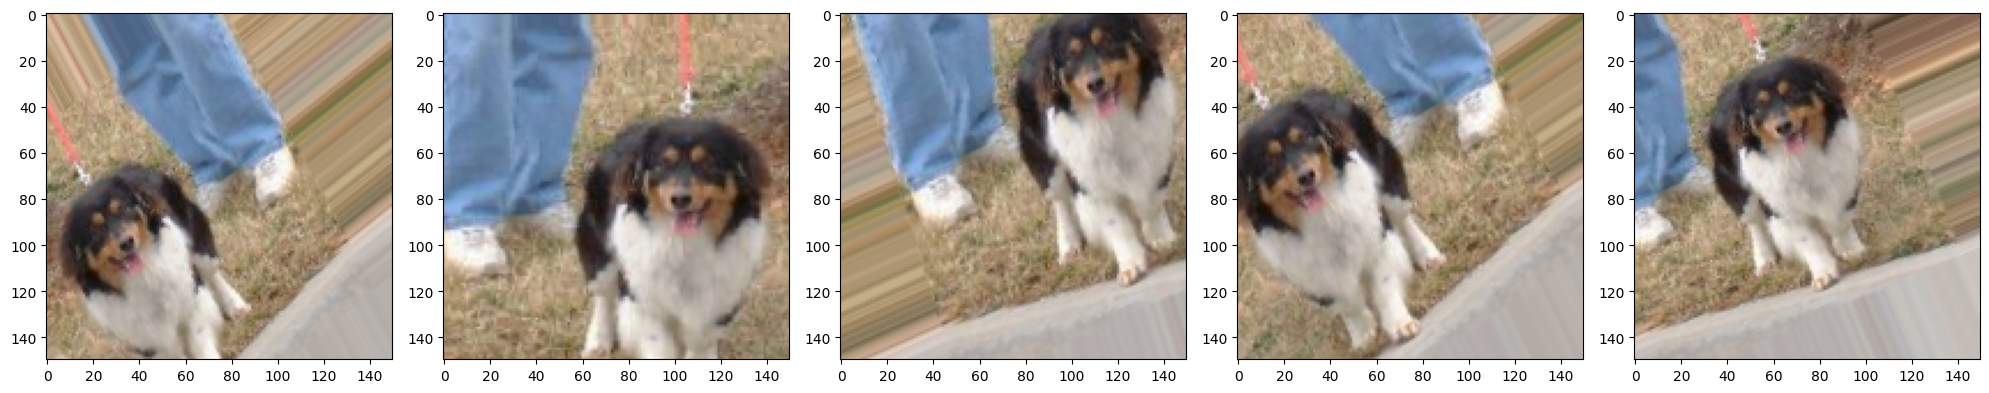

In [12]:
images=[training_data[0][0][0] for i in range(5)]
plotImages(images)

In [13]:
#create cnn model
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=(150,150,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding='valid',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    keras.layers.Conv2D(filters=128,kernel_size=3,padding='valid',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=1,activation='sigmoid'),

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,837,569 (18.45 MB)

 Trainable params: 4,837,121 (18.45 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Path to save best model
model_path = '/content/drive/MyDrive/Call back Model/Cats or Dogs.h5'


# Save best model (highest val_accuracy)
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

# Stop training if val_accuracy doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8,
                               restore_best_weights=True, mode='max', verbose=1)

# Combine callbacks
callbacks_list = [checkpoint, early_stopping]

In [17]:
history = model.fit(training_data,
                          epochs=20,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.5541 - loss: 1.1982
Epoch 1: val_accuracy improved from -inf to 0.60260, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 240ms/step - accuracy: 0.5541 - loss: 1.1977 - val_accuracy: 0.6026 - val_loss: 0.6554
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.6235 - loss: 0.6457
Epoch 2: val_accuracy improved from 0.60260 to 0.60880, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 235ms/step - accuracy: 0.6236 - loss: 0.6457 - val_accuracy: 0.6088 - val_loss: 0.6549
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.6898 - loss: 0.5869
Epoch 3: val_accuracy improved from 0.60880 to 0.64620, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 234ms/step - accuracy: 0.6898 - loss: 0.5869 - val_accuracy: 0.6462 - val_loss: 0.7514
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.7228 - loss: 0.5438
Epoch 4: val_accuracy improved from 0.64620 to 0.74680, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 236ms/step - accuracy: 0.7228 - loss: 0.5438 - val_accuracy: 0.7468 - val_loss: 0.5174
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.7441 - loss: 0.5194
Epoch 5: val_accuracy improved from 0.74680 to 0.78760, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.7441 - loss: 0.5194 - val_accuracy: 0.7876 - val_loss: 0.4541
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.7691 - loss: 0.4820
Epoch 6: val_accuracy did not improve from 0.78760
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 234ms/step - accuracy: 0.7691 - loss: 0.4820 - val_accuracy: 0.6702 - val_loss: 0.8001
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.7884 - loss: 0.4510
Epoch 7: val_accuracy improved from 0.78760 to 0.79400, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 234ms/step - accuracy: 0.7884 - loss: 0.4510 - val_accuracy: 0.7940 - val_loss: 0.4407
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.8111 - loss: 0.4203
Epoch 8: val_accuracy did not improve from 0.79400
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.8111 - loss: 0.4203 - val_accuracy: 0.6338 - val_loss: 0.6982
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8241 - loss: 0.4004
Epoch 9: val_accuracy improved from 0.79400 to 0.85480, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8241 - loss: 0.4004 - val_accuracy: 0.8548 - val_loss: 0.3468
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8375 - loss: 0.3726
Epoch 10: val_accuracy did not improve from 0.85480
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 231ms/step - accuracy: 0.8375 - loss: 0.3726 - val_accuracy: 0.7900 - val_loss: 0.4864
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.8454 - loss: 0.3603
Epoch 11: val_accuracy did not improve from 0.85480
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 231ms/step - accuracy: 0.8454 - loss: 0.3603 - val_accuracy: 0.7662 - val_loss: 0.4708
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8434 - loss: 0.3435
Epoch 12: val_accuracy improved from 0.85480 to 0.86800, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - accuracy: 0.8434 - loss: 0.3435 - val_accuracy: 0.8680 - val_loss: 0.3140
Epoch 13/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8597 - loss: 0.3223
Epoch 13: val_accuracy did not improve from 0.86800
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8597 - loss: 0.3224 - val_accuracy: 0.8562 - val_loss: 0.3158
Epoch 14/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8610 - loss: 0.3191
Epoch 14: val_accuracy did not improve from 0.86800
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 231ms/step - accuracy: 0.8610 - loss: 0.3191 - val_accuracy: 0.8130 - val_loss: 0.6034
Epoch 15/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8626 - loss: 0.3147
Epoch 15: val_accuracy improved from 0.86800 to 0.88740, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 233ms/step - accuracy: 0.8626 - loss: 0.3147 - val_accuracy: 0.8874 - val_loss: 0.2634
Epoch 16/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8707 - loss: 0.3042
Epoch 16: val_accuracy did not improve from 0.88740
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 233ms/step - accuracy: 0.8707 - loss: 0.3042 - val_accuracy: 0.8816 - val_loss: 0.2686
Epoch 17/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8751 - loss: 0.2912
Epoch 17: val_accuracy did not improve from 0.88740
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 231ms/step - accuracy: 0.8751 - loss: 0.2912 - val_accuracy: 0.8556 - val_loss: 0.3912
Epoch 18/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8807 - loss: 0.2871
Epoch 18: val_accuracy improved from 0.88740 to 0.89400, saving model to /content/drive/MyDrive/Call back Model/Cats or Dogs.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 235ms/step - accuracy: 0.8807 - loss: 0.2871 - val_accuracy: 0.8940 - val_loss: 0.2644
Epoch 19/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8795 - loss: 0.2867
Epoch 19: val_accuracy did not improve from 0.89400
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8795 - loss: 0.2867 - val_accuracy: 0.8850 - val_loss: 0.2717
Epoch 20/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.8821 - loss: 0.2792
Epoch 20: val_accuracy did not improve from 0.89400
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 228ms/step - accuracy: 0.8821 - loss: 0.2792 - val_accuracy: 0.7770 - val_loss: 0.6265
Restoring model weights from the end of the best epoch: 18.


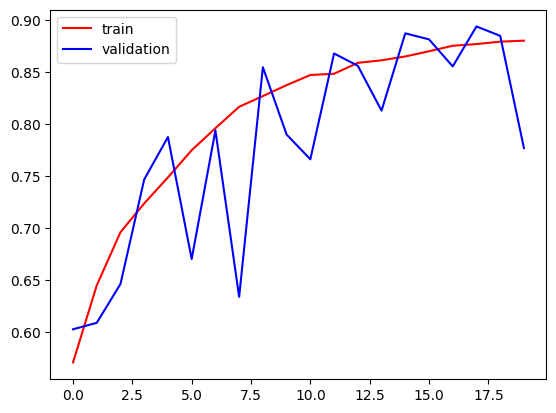

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import matplotlib.image as mpimg
imgg=mpimg.imread('/content/drive/MyDrive/img4.jpg')

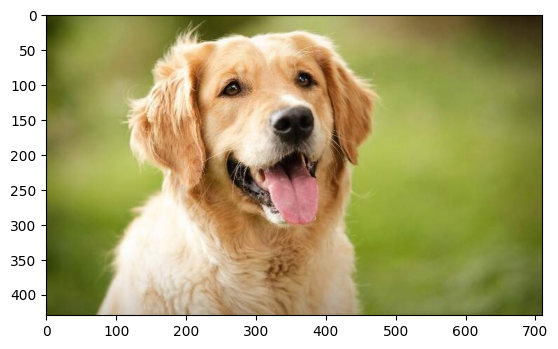

In [24]:
plt.imshow(imgg)
plt.show()

In [25]:
imgg.shape

(430, 710, 3)

In [26]:
import cv2
imgg=cv2.resize(imgg,(150,150))

In [27]:
imgg_input=imgg.reshape((1,150,150,3))

In [50]:
model.predict(imgg_input).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)

In [43]:
img2=mpimg.imread('/content/drive/MyDrive/im3.jpg')

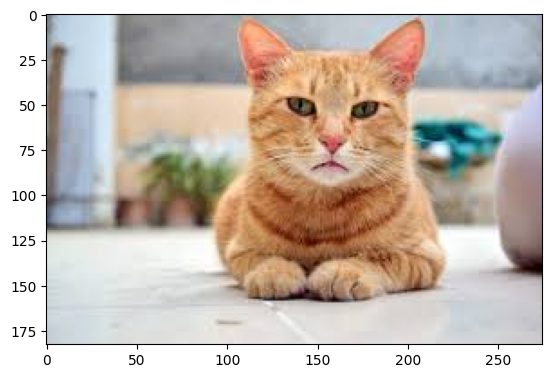

In [44]:
plt.imshow(img2)
plt.show()

In [45]:
img2.shape

(183, 275, 3)

In [46]:
img2=cv2.resize(img2,(150,150))

In [47]:
img2_input=img2.reshape((1,150,150,3))

In [49]:
model.predict(img2_input).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)